<a href="https://colab.research.google.com/github/luorix1/ML_DL-self_study/blob/main/using_checkpoints.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [35]:
import tensorflow as tf
import numpy as np
import pandas as pd
from tensorflow import keras
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [4]:
def make_model(layers=None):
  model = keras.Sequential()
  model.add(keras.layers.Flatten(input_shape=(28, 28)))
  model.add(keras.layers.Dense(100, activation='relu'))
  model.add(layers)
  model.add(keras.layers.Dense(10, activation='softmax'))
  return model

In [26]:
(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()

In [27]:
train_scaled = train_input / 255.0
train_scaled, val_scaled, train_target, val_target = train_test_split(train_scaled, train_target, test_size=0.2)

In [28]:
model = make_model(keras.layers.Dropout(0.3))

In [29]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')

In [30]:
checkpoint_cb = keras.callbacks.ModelCheckpoint('best_model.h5')
early_stopping_cb = keras.callbacks.EarlyStopping(patience=2, restore_best_weights=True)

In [32]:
history = model.fit(train_scaled, train_target, epochs=20, validation_data=(val_scaled, val_target), callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.5912 - accuracy: 0.7909 - val_loss: 0.4402 - val_accuracy: 0.8403
Epoch 2/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.4401 - accuracy: 0.8422 - val_loss: 0.3857 - val_accuracy: 0.8597
Epoch 3/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.4006 - accuracy: 0.8559 - val_loss: 0.3724 - val_accuracy: 0.8616
Epoch 4/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3803 - accuracy: 0.8620 - val_loss: 0.3692 - val_accuracy: 0.8677
Epoch 5/20
1500/1500 [==============================] - 4s 2ms/step - loss: 0.3641 - accuracy: 0.8669 - val_loss: 0.3424 - val_accuracy: 0.8765
Epoch 6/20
1500/1500 [==============================] - 4s 2ms/step - loss: 0.3541 - accuracy: 0.8709 - val_loss: 0.3493 - val_accuracy: 0.8748
Epoch 7/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3406 - accuracy: 0.8734 - val_loss: 0.3342 - val_accuracy:

In [33]:
print(early_stopping_cb.stopped_epoch)

8


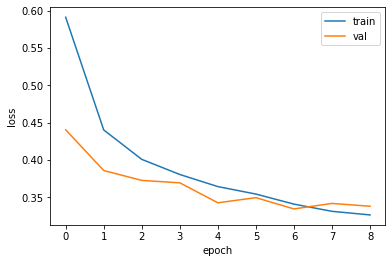

In [36]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

In [37]:
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 1s 1ms/step - loss: 0.3342 - accuracy: 0.8796


[0.334157258272171, 0.8795833587646484]